# <center>Numerikus Matematika</center>

## <center>1.feladatsor</center>

### <center>Lebegőpontos számábrázolás, alapműveletek, példák stabil/instabil eljárásokra</center>

<br>
<b>1.feladat.</b> Gépeljük be az $1/3$ értéket Octave-ban. Használjuk a begépelés után a <i>format long</i> és <i>format</i> parancsokat. A <i>help</i> függvény segítségével értelmezzük a <i>format</i> parancs opcióit és kísérletezzünk azokkal!

In [15]:
1/3

ans =  0.33333


In [16]:
format long
1/3

ans =  0.333333333333333


In [17]:
format
1/3

ans =  0.33333


In [8]:
% Nezzuk meg a help segitsegevel a kulonbozo format opciokat es kiserletezzunk
help format 

'format' is a built-in function from the file libinterp/corefcn/pr-output.cc

 -- format
 -- format options
 -- [FORMAT, FORMATSPACING] = format
     Reset or specify the format of the output produced by 'disp' and
     Octave's normal echoing mechanism.

     This command only affects the display of numbers, but not how they
     are stored or computed.  To change the internal representation from
     the default double use one of the conversion functions such as
     'single', 'uint8', 'int64', etc.

     By default, Octave displays 5 significant digits in a human
     readable form (option 'short' paired with 'loose' format for
     matrices).  If 'format' is invoked without any options, this
     default format is restored.

     Valid formats for floating point numbers are listed in the
     following table.

     'short'
          Fixed point format with 5 significant figures (default).

     'long'
          Fixed point format with 16 significant figures.

          As with the 

In [61]:
% Kiserletezesre pl
format short
1/3
format short e
1/3
format short eng
1/3
format short g
1/3
format long
1/3
format long e
1/3
format long eng
1/3
format long g
1/3

ans =  0.33333
ans =    3.3333e-01
ans =   333.3333e-003
ans =    0.33333
ans =  0.333333333333333
ans =    3.33333333333333e-01
ans =   333.33333333333331e-003
ans =    0.333333333333333


<br>
<b>2.feladat.</b> Előadáson tanultuk, hogy lebegőpontos számok esetén az összeadás és szorzás nem asszociatív művelet, valamint a disztributív tulajdonság sem áll fenn. Győzödjünk meg erről összeadás esetében, ha

<br> 
$$a=0.4,\ b=-0.5,\ c=0.1.$$

Formálisan logikai operátor segítségével is ellenőrrizük az állítás mivoltát!

In [75]:
% Osszeadas
format long
a=0.4; b=-0.5; c=0.1;
a+(b+c)
(a+b)+c

% Előtte gyakoroljuk ezt == (egyenlo) es ~= (nem egyenlo)
%2+3==1+4 % Igaz=1 Nem igaz=0
%2+3!=1+5 %alternativa (x != y vagy x ~= y) Igaz x nem egyenlo y.
%2+3~=1+4

% A konkret peldara
a+(b+c)==(a+b)+c

ans = 0
ans =    2.77555756156289e-17
ans = 0


<br>
<b>3.feladat.</b> A help parancs segítségével értelmezzük az <i>eps</i>, <i>realmin</i> és <i>realmax</i> parancsokat. Mit jelentenek ezek az értékek a tanult gépi számok témakör fényében?

In [ ]:
help eps
help realmin
help realmax


In [3]:
eps
realmin
realmax

ans =    2.2204e-16
ans =   2.2251e-308
ans =   1.7977e+308


<br>
<b>4.feladat.</b> Tekintsük az $a_1+a_2+\ldots+a_n$ alakú összegek kiszámításásra az alább két algoritmust.
<br><br>

<table>
 <tr>
    <th>Algoritmus 1</th>
    <th>Algoritmus 2</th> 
  </tr>
  <tr>
    <td>s=0;<br>
     for i=1:n<br>
         &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s=s+a_i;<br>
     end
     </td>
     <td>s=0;<br>
     for i=n:-1:1<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;s=s+a_i;<br>
     end
     </td>
  </tr>
</table>
<br>
Mit jelent a két algoritmus? Az eddigiek tanultak fényében a futtatás előtt mit várunk? Írjunk szkriptet, mely kiszámolja az $S_n=\displaystyle\sum_{i=1}^n \frac{1}{i\cdot(i+1)}$ értékét mindkét algoritmussal $n=999999$ esetén!

In [61]:
% Algoritmus 1
format long
n=999999;
s=0; 
for i=1:n 
    s=s+1/(i*(i+1)); 
end 
s

s =  0.999999000000048


In [62]:
% Algoritmus 2
n=999999;
s=0; 
for i=n:-1:1 
    s=s+1/(i*(i+1)); 
end
s

s =  0.999999000000000


<br>
<b>5.feladat.</b> Tekintsük az alábbi integrált:
$$\displaystyle I_n=\int_0^1\frac{x^n}{10+x}dx,$$ ahol $n\in\mathbb{N}$. Igazolható, hogy <br>

+ $I_n\geq 0$, <br>
+ $I_{n+1}\leq I_n$ és <br>
+ $I_n\to 0$, ha $n\to\infty$. <br>

Továbbá $I_n$ kiszámítására felírható az alábbi
$$I_n=\frac{1}{n}-10I_{n-1},\ I_0=\ln(1.1) $$
rekurzió is. 
<br><br>
(a) Írjunk programot <i>rekurzio.m</i> néven, mely adott $n$-re kiszámolja az integrál közelítő értékét. Mit tapasztalunk nagy $n$ esetén? Adjunk ehhez precíz elméleti magyarázatot!

In [84]:
% Gondolkodashoz
format long
n=18;
I_1=zeros(n+1,1);
I_1(1)=log(1.1); % I_1(1) a feladatbeli I_0
                 % Hivjuk fel a figyelmet az elmeleti es az Octave-os indexelesre!
for i=1:n
    I_1(i+1)=1/(i)-10*I_1(i);
end    
I_1

I_1 =

   9.53101798043249e-02
   4.68982019567507e-02
   3.10179804324935e-02
   2.31535290083985e-02
   1.84647099160155e-02
   1.53529008398455e-02
   1.31376582682119e-02
   1.14805601750236e-02
   1.01943982497636e-02
   9.16712861347463e-03
   8.32871386525372e-03
   7.62195225655374e-03
   7.11381076779595e-03
   5.78496924511743e-03
   1.35788789773972e-02
  -6.91221231073049e-02
   7.53721231073049e-01
  -7.47838878131872e+00
   7.48394433687428e+01



In [2]:
% Maga a program es tapasztalas
[I_1] = rekurzio(32)
% A gepi epszilon miatt varhato, hogy a tizenkozepe (14) elemnel romlik el az iteracio
% lasd a levezetes miatt d_n=(-10)^n*epsilon (Octave eps=2.2204e-16)

I_1 =

   9.531017980432493e-02
   4.689820195675065e-02
   3.101798043249349e-02
   2.315352900839845e-02
   1.846470991601545e-02
   1.535290083984547e-02
   1.313765826821192e-02
   1.148056017502364e-02
   1.019439824976365e-02
   9.167128613474629e-03
   8.328713865253717e-03
   7.621952256553738e-03
   7.113810767795950e-03
   5.784969245117427e-03
   1.357887897739715e-02
  -6.912212310730485e-02
   7.537212310730486e-01
  -7.478388781318721e+00
   7.483944336874276e+01
  -7.483418021084802e+02
   7.483468021084803e+03
  -7.483463259180041e+04
   7.483463713725496e+05
  -7.483463670247235e+06
   7.483463674413903e+07
  -7.483463674013903e+08
   7.483463674052364e+09
  -7.483463674048662e+10
   7.483463674049020e+11
  -7.483463674048985e+12
   7.483463674048989e+13
  -7.483463674048989e+14
   7.483463674048989e+15



(b) Írjunk programot <i>stabilrekurzio.m</i> néven, mely stabillá teszi a rekurziót az $$I_{n}:=0,\ I_{n-1}=\frac{1}{10}\left(\frac{1}{n}-I_n\right),$$
rekurzió segítségével! 

In [7]:
% Stabil rekurzió
[I_2] = stabilrekurzio(23)

I_2 =

   4.689820195675140e-02
   3.101798043248601e-02
   2.315352900847329e-02
   1.846470991526711e-02
   1.535290084732894e-02
   1.313765819337729e-02
   1.148056092337000e-02
   1.019439076629998e-02
   9.167203448111332e-03
   8.327965518886694e-03
   7.629435720223986e-03
   7.038976131093478e-03
   6.533315612142151e-03
   6.095415307149918e-03
   5.712513595167490e-03
   5.374864048325107e-03
   5.074888928513642e-03
   4.806666270419131e-03
   4.564916243177113e-03
   4.350837568228873e-03
   4.110671936758893e-03
   4.347826086956522e-03
   0.000000000000000e+00



<br>
<b>6.feladat.</b> Írjunk szkriptet, mely ábrázolja az $1$ kis környezetében az $(x-1)^8$ kifejezés értékét az alábbi 
<br>

+ $f(x)=(x-1)^8$ és <br>
+ $g(x)=x^8 - 8x^7 + 28x^6 - 56x^5 + 70x^4 - 56x^3 + 28x^2 - 8x + 1$

függvények segítségével!


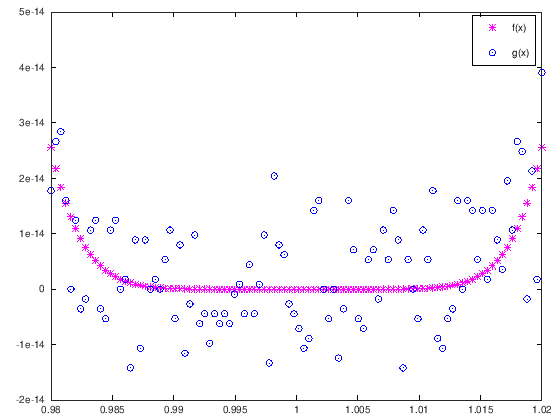

In [68]:
% Vezessuk be egyszeru peldan a linspace, plot, legend harmast
%t=linspace(-3,3,85);
%plot(t,t,t,t.^3,'mo')
%legend('linerais ~ t', 'kobos ~ t^3')


x=linspace(0.98,1.02,100);
f=(x-1).^8;
g=x.^8 - 8*x.^7 + 28*x.^ 6 - 56*x.^5 + 70*x.^4 - 56*x.^3 + 28*x.^2 - 8*x + 1;
plot(x,f,'m*',x,g,'bo')
legend('f(x)','g(x)')

<br>
<b>7.feladat.</b> (a) Vizsgáljuk meg az alábbi<br>

$$2^{66} + 1 == 2^{66},\
2^{66} + 10 == 2^{66},\
2^{66} + 100 == 2^{66},\
2^{66} + 1000 == 2^{66},\ 
2^{66} + 10000 == 2^{66}$$ 
<br>
logikai kifejezések értékét!

In [32]:
% (a)
2^66 + 1 == 2^66
2^66 + 10 == 2^66
2^66 + 100 == 2^66
2^66 + 1000 == 2^66
2^66 + 10000 == 2^66

ans = 1
ans = 1
ans = 1
ans = 1
ans = 0


(b) Keressük meg azt a legkisebb $n\in\mathbb{N}$ számot, amelyre a $2^{66}+n==2^{66}$ logikai kifejezés értéke hamis!

In [76]:
% (b)
n=1;
while 2^66 + n == 2^66
   n++; 
end
n

n =  8193


In [43]:
% Ellenorzes
2^66 + 8192 == 2^66
2^66 + 8193 == 2^66

ans = 1
ans = 0
